In [1]:
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from notebook_utils import *

In [2]:
data = pd.read_csv('bank_traffic_data.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10013 entries, 0 to 10012
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   timestamp  10013 non-null  object
 1   count      10013 non-null  int64 
 2   window     10013 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 234.8+ KB


In [4]:
data.describe()

,count,window
count,10013.000000,10013.000000
mean,261.946669,8.020673
std,453.700521,4.334112
min,0.000000,1.000000
25%,0.000000,4.000000
50%,134.000000,8.000000
75%,211.000000,12.000000
max,4670.000000,15.000000


In [5]:
data.head()

,timestamp,count,window
0,2019-09-26 02:00:00+02:00,764,1
1,2019-09-27 02:00:00+02:00,0,1
2,2019-09-28 02:00:00+02:00,0,1
3,2019-09-29 02:00:00+02:00,1973,1
4,2019-09-30 02:00:00+02:00,1908,1


In [6]:
data.tail()

,timestamp,count,window
10008,2021-07-27 02:00:00+02:00,173,15
10009,2021-07-28 02:00:00+02:00,117,15
10010,2021-07-29 02:00:00+02:00,137,15
10011,2021-07-30 02:00:00+02:00,0,15
10012,2021-07-31 02:00:00+02:00,0,15


In [7]:
type(data.iloc[0]['timestamp'])

str

In [8]:
# convert timestamp column's data type to datetime since it appears to be a plain string
data['timestamp'] = pd.to_datetime(data['timestamp']).dt.date
print(type(data.iloc[0]['timestamp']))
data.head()

<class 'datetime.date'>


,timestamp,count,window
0,2019-09-26,764,1
1,2019-09-27,0,1
2,2019-09-28,0,1
3,2019-09-29,1973,1
4,2019-09-30,1908,1


In [9]:
month_year_grouped = pd.DataFrame({
    'date': data['timestamp'].apply(lambda x: x.strftime('%Y-%m')),
    'window': data['window'], 
    'count': data['count']
})
month_year_grouped = month_year_grouped.groupby(['date'])['count'].sum().reset_index()
month_year_grouped.head()

,date,count
0,2019-09,12087
1,2019-10,128162
2,2019-11,112411
3,2019-12,159805
4,2020-01,87852


In [10]:
type(month_year_grouped.iloc[0]['date'])

str

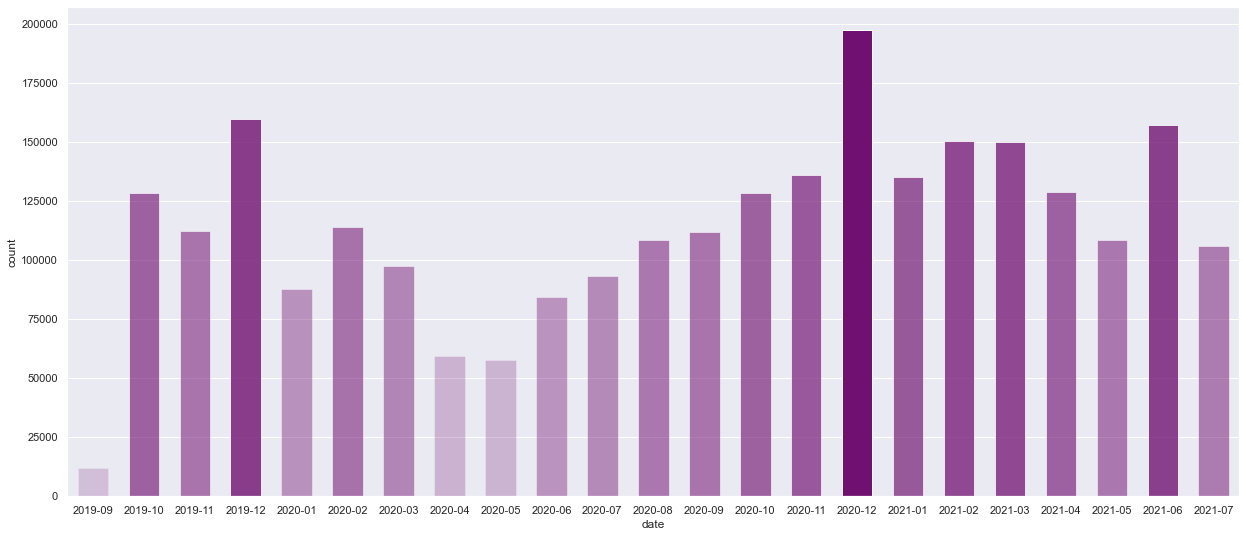

In [11]:
sns.set(rc={'figure.figsize': (21,9)})
barplot = sns.barplot(x='date', y='count', data=month_year_grouped, color='purple')
for bar, alpha in zip(barplot.containers[0], get_alpha_values(month_year_grouped['count'])):
    bar.set_alpha(alpha)
change_width(barplot, 0.6)

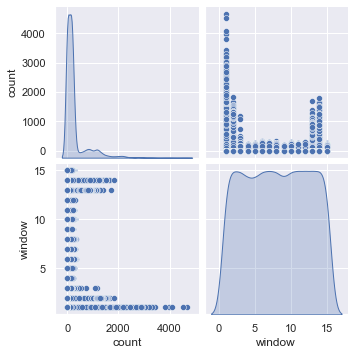

In [12]:
sns.pairplot(data, diag_kind='kde')

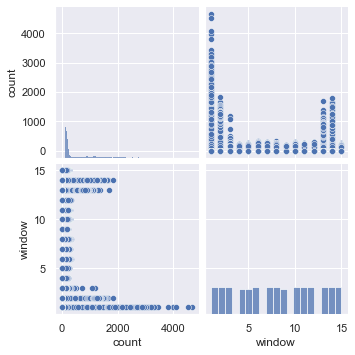

In [13]:
sns.pairplot(data, diag_kind='hist')

In [14]:
scaler = StandardScaler()
scaler.fit(data.drop(['timestamp'], axis=1))
scaled_data = scaler.transform(data.drop(['timestamp'], axis=1))
print(scaled_data)

[[ 1.10662955 -1.61994499]
 [-0.57738472 -1.61994499]
 [-0.57738472 -1.61994499]
 ...
 [-0.27540834  1.61040479]
 [-0.57738472  1.61040479]
 [-0.57738472  1.61040479]]


In [15]:
pca = PCA()
pca.fit(scaled_data)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)
print(pca.explained_variance_)
x_pca = pca.transform(scaled_data)

[0.61048845 0.38951155]
[110.56962382  88.31963704]
[1.22109885 0.77910091]


In [16]:
print(scaled_data.shape)
print(x_pca.shape)
print(pca.components_)

(10013, 2)
(10013, 2)
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


<AxesSubplot:>

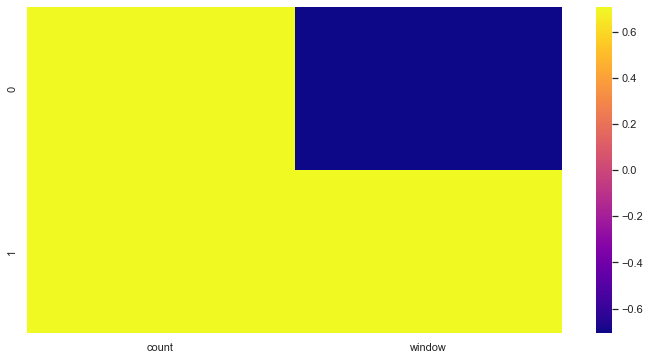

In [17]:
df_comp = pd.DataFrame(pca.components_,columns=data.drop(['timestamp'], axis=1).columns)
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',)

# Prepare Training Data from Model Training

In [18]:
# extract day, month, year info from timestamp column and create new columns containing the extrcated info
data['day'] = data['timestamp'].map(lambda x: x.day)
data['month'] = data['timestamp'].map(lambda x: x.month)
data['year'] = data['timestamp'].map(lambda x: x.year)

# drop the original timestamp column
# data.drop(columns=['timestamp'], index=1, inplace=True)

# take a look at the data after the previous changes
data.head()

,timestamp,count,window,day,month,year
0,2019-09-26,764,1,26,9,2019
1,2019-09-27,0,1,27,9,2019
2,2019-09-28,0,1,28,9,2019
3,2019-09-29,1973,1,29,9,2019
4,2019-09-30,1908,1,30,9,2019
